In [52]:
import yfinance as yf
import pandas as pd
# pip install yfinance
import numpy as np
import hvplot
import hvplot.pandas
import holoviews as hv
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime # convert timestamp and revese to string
%matplotlib inline
import quantstats as qs
import pandas_ta as ta
import math



ModuleNotFoundError: No module named 'pandas_ta'

# Down Load the SPY Data Frame

In [53]:
# While closing price merely refers to the cost of shares at the end of the day, 
#the adjusted closing price considers other factors like dividends, stock splits,
#and new stock offerings. Since the adjusted closing price begins where the closing price ends,
#it can be called a more accurate measure of stocks' value.
SPYadj=yf.download("SPY")
SPYadj

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334026,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514208,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568254,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838556,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946651,531500
...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900


# Download ACWX data

In [54]:
#https://etfdb.com/index/msci-all-country-world-index-ex-usa/
ACWXdf=yf.download("ACWX")
ACWXdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-04-01,50.910000,51.360001,50.910000,51.360001,36.048752,1100
2008-04-02,51.849998,52.029999,51.849998,51.860001,36.399700,2000
2008-04-03,52.110001,52.360001,52.110001,52.320000,36.722569,1800
2008-04-04,57.549999,57.549999,52.259998,52.450001,36.813820,1700
2008-04-07,52.209999,52.709999,50.820000,52.709999,36.996304,800
...,...,...,...,...,...,...
2022-12-05,47.139999,47.200001,46.480000,46.570000,46.570000,3040500
2022-12-06,46.660000,46.759998,46.230000,46.380001,46.380001,1848800
2022-12-07,46.299999,46.480000,46.139999,46.299999,46.299999,2049400


In [55]:
#### try vs code for qsstats

# Data Validation

In [56]:
SPYadj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7522 entries, 1993-01-29 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7522 non-null   float64
 1   High       7522 non-null   float64
 2   Low        7522 non-null   float64
 3   Close      7522 non-null   float64
 4   Adj Close  7522 non-null   float64
 5   Volume     7522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 411.4 KB


In [57]:
# note after dropna() still 7518 row; 
SPYadj.dropna()
SPYadj['SPY return']=((SPYadj['Close']-SPYadj['Open'])/SPYadj['Open']*100).round(2)
SPYadj

,Open,High,Low,Close,Adj Close,Volume,SPY return
Date,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334026,1003200,-0.07
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514208,480500,0.64
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568254,201300,0.28
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838556,529400,0.91
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946651,531500,0.07
...,...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.40
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06


In [58]:
# note still 3689 rows after
ACWXdf.dropna()
ACWXdf['ACWX return']=((ACWXdf['Close']-ACWXdf['Open'])/ACWXdf['Open']*100).round(2)
ACWXdf

,Open,High,Low,Close,Adj Close,Volume,ACWX return
Date,,,,,,,
2008-04-01,50.910000,51.360001,50.910000,51.360001,36.048752,1100,0.88
2008-04-02,51.849998,52.029999,51.849998,51.860001,36.399700,2000,0.02
2008-04-03,52.110001,52.360001,52.110001,52.320000,36.722569,1800,0.40
2008-04-04,57.549999,57.549999,52.259998,52.450001,36.813820,1700,-8.86
2008-04-07,52.209999,52.709999,50.820000,52.709999,36.996304,800,0.96
...,...,...,...,...,...,...,...
2022-12-05,47.139999,47.200001,46.480000,46.570000,46.570000,3040500,-1.21
2022-12-06,46.660000,46.759998,46.230000,46.380001,46.380001,1848800,-0.60
2022-12-07,46.299999,46.480000,46.139999,46.299999,46.299999,2049400,0.00


# Time Handler function()1

In [59]:
# from datetime import datetime, change time stamp to str
def dftimeStaptoString(df):
    df.index.strftime("%Y-%m-%d")
    return df

# Time Handler function()2

In [60]:
# cut the time frame/period for study needs; disimble timestamp to diff columns
def timeHandlerFC(df):
    df=df.assign(year=df.index.year, month=df.index.month,day=df.index.day)
    return df

# DataFrame Time Slicer

In [61]:
# study the index for and datetime libaray
def dataFrameYrselectionFC(df,time):
    df=df.loc[df.index>=time]
    return df

In [62]:
SPYadj=dataFrameYrselectionFC(df=SPYadj,time='2008-04-01')
SPYadj

,Open,High,Low,Close,Adj Close,Volume,SPY return
Date,,,,,,,
2008-04-01,133.610001,136.839996,133.509995,136.610001,102.735832,254547300,2.25
2008-04-02,137.050003,137.669998,135.979996,136.699997,102.803497,210910800,-0.26
2008-04-03,135.960007,137.440002,135.710007,137.039993,103.059135,175884800,0.79
2008-04-04,137.119995,137.960007,136.119995,136.889999,102.946358,204446800,-0.17
2008-04-07,137.869995,138.570007,136.740005,136.960007,102.999031,154245500,-0.66
...,...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.40
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06


# Visualization

The pearson correlation between the two factors is 0.8
The p-value between the two factors is 0.0


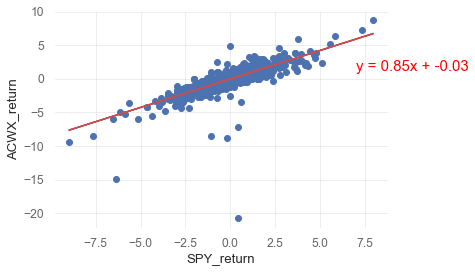

In [63]:
# merging the two dataframes and generating scatter plot with linear regression
spy_acwx_df1 = pd.merge(SPYadj, ACWXdf, how="outer", on=["Date"])
spy_acwx_df2 = spy_acwx_df1[["SPY return","ACWX return"]]

SPY_return = spy_acwx_df2["SPY return"]
ACWX_return = spy_acwx_df2["ACWX return"]
correlation = st.pearsonr(SPY_return, ACWX_return)
(slope, intercept, rvalue, pvalue, stderr) = linregress(SPY_return, ACWX_return)
regress_values = SPY_return * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The pearson correlation between the two factors is {round(correlation[0],2)}")
print(f"The p-value between the two factors is {pvalue}")
plt.scatter(SPY_return, ACWX_return)
plt.plot(SPY_return, regress_values, "r-")
plt.annotate(line_eq,(7,1.2),fontsize=15,color="red")
plt.xlabel("SPY_return")
plt.ylabel("ACWX_return")
plt.show()


In [65]:
# hvplot for sentiment analysis
twitter_senti_data = "sentiment2022-12-10.xlsx"
sentiment_analysis_result = pd.read_excel(twitter_senti_data)
sentiment_analysis_df = pd.DataFrame(sentiment_analysis_result)
sentiment_analysis_df["return%"] = sentiment_analysis_df["return%"].str.rstrip("%").astype("float")/100
df1=pd.DataFrame(sentiment_analysis_df['return%'])
df2=pd.DataFrame(sentiment_analysis_df['helper'])
(df1.hvplot(label='c')*df2.hvplot(label='d'))


:Overlay
   .Curve.C :Curve   [index]   (return%)
   .Curve.D :Curve   [index]   (helper)

In [66]:
sentiment_df2 = sentiment_analysis_df.copy()

<AxesSubplot:ylabel='sentiment'>

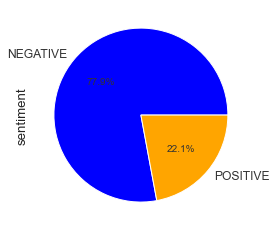

In [77]:
# creating pie chart
sentiment_result1 = "sentimentresult.csv"
sentiment_result2 = pd.read_csv(sentiment_result1)
sentiment_result3 = pd.DataFrame(sentiment_result2)
sentiment_result3
neg_pos_count = sentiment_result3['sentiment'].value_counts()
neg_pos_count.plot(kind='pie', autopct='%1.1f%%', colors = ['blue', 'orange'])

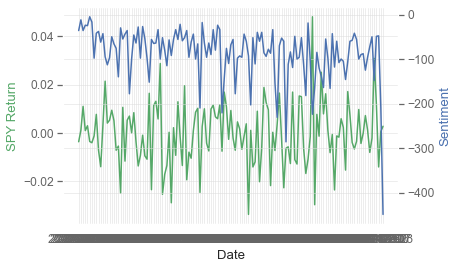

In [68]:
x = sentiment_analysis_df["Date"]
y1 = sentiment_analysis_df["return%"]
y2 = sentiment_analysis_df["helper"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('SPY Return', color='g')
ax2.set_ylabel('Sentiment', color='b')

# ax1.set_xlim([datetime.date(2021, 12, 17), datetime.date(2022, 12, 8)])

plt.show()

In [69]:
sentiment_analysis_df

,Date,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange,helper
0,2021-12-17,461.549988,464.739990,458.059998,459.869995,454.606476,135511600,-0.0036,"(-0.99, 0.01]",6.679993,-36
1,2021-12-20,454.480011,455.399994,451.140015,454.980011,449.772461,107134800,0.0011,"(0.01, 1.01]",4.259979,-12
2,2021-12-27,472.059998,477.309998,472.010010,477.260010,471.797455,56808600,0.0110,"(1.01, 2.01]",5.299988,-36
3,2021-12-29,476.980011,478.559998,475.920013,477.480011,472.014954,54503000,0.0010,"(0.01, 1.01]",2.639984,-24
4,2022-01-03,476.299988,477.850006,473.850006,477.709991,472.242310,72668200,0.0030,"(0.01, 1.01]",4.000000,-25
...,...,...,...,...,...,...,...,...,...,...,...
134,2022-11-30,395.489990,407.679993,393.480011,407.679993,407.679993,144566700,0.0308,"(3.01, 4.01]",14.199982,-148
135,2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900,0.0116,"(1.01, 2.01]",5.719971,-49
136,2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-0.0140,"(-1.99, -0.99]",8.349976,-48
137,2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.0006,"(0.01, 1.01]",3.670013,-209


The pearson correlation between the two factors is -0.06
The pvalue between the two factors is 0.518401360305648


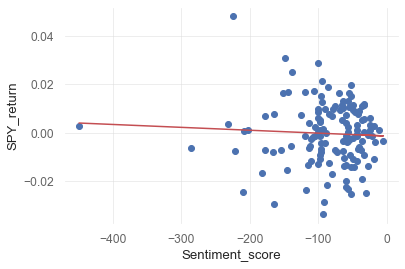

In [43]:
# Scatter plot for sentiment vs SPY return:
Sentiment_score = sentiment_analysis_df["helper"]
SPY_return = sentiment_analysis_df["return%"]
correlation = st.pearsonr(Sentiment_score, SPY_return)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sentiment_score, SPY_return)
regress_values = Sentiment_score * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The pearson correlation between the two factors is {round(correlation[0],2)}")
print(f'The pvalue between the two factors is {pvalue}')
plt.scatter(Sentiment_score, SPY_return)
plt.plot(Sentiment_score, regress_values, "r-")
plt.annotate(line_eq,(7,1.2),fontsize=15,color="red")
plt.xlabel("Sentiment_score")
plt.ylabel("SPY_return")
plt.show()


In [25]:
# Import the sentiment analysis result
# sentiment_analysis_data = "sentiment2022-12-10.xlsx"
# sentiment_analysis_df = pd.DataFrame(sentiment_analysis_result)
# sentiment_analysis_df

In [32]:
senti_rename

,Date,Open,High,Low,Close,Adj Close,Volume,return%,daily_%return_range,TrueRange,helper
0,2021-12-17,461.549988,464.739990,458.059998,459.869995,454.606476,135511600,-0.0036,"(-0.99, 0.01]",6.679993,-36
1,2021-12-20,454.480011,455.399994,451.140015,454.980011,449.772461,107134800,0.0011,"(0.01, 1.01]",4.259979,-12
2,2021-12-27,472.059998,477.309998,472.010010,477.260010,471.797455,56808600,0.0110,"(1.01, 2.01]",5.299988,-36
3,2021-12-29,476.980011,478.559998,475.920013,477.480011,472.014954,54503000,0.0010,"(0.01, 1.01]",2.639984,-24
4,2022-01-03,476.299988,477.850006,473.850006,477.709991,472.242310,72668200,0.0030,"(0.01, 1.01]",4.000000,-25
...,...,...,...,...,...,...,...,...,...,...,...
134,2022-11-30,395.489990,407.679993,393.480011,407.679993,407.679993,144566700,0.0308,"(3.01, 4.01]",14.199982,-148
135,2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900,0.0116,"(1.01, 2.01]",5.719971,-49
136,2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-0.0140,"(-1.99, -0.99]",8.349976,-48
137,2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.0006,"(0.01, 1.01]",3.670013,-209


In [34]:
SPYadj

,Open,High,Low,Close,Adj Close,Volume,SPY return
Date,,,,,,,
2008-04-01,133.610001,136.839996,133.509995,136.610001,102.735825,254547300,2.25
2008-04-02,137.050003,137.669998,135.979996,136.699997,102.803444,210910800,-0.26
2008-04-03,135.960007,137.440002,135.710007,137.039993,103.059212,175884800,0.79
2008-04-04,137.119995,137.960007,136.119995,136.889999,102.946388,204446800,-0.17
2008-04-07,137.869995,138.570007,136.740005,136.960007,102.999016,154245500,-0.66
...,...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.40
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06


In [42]:
SPYadj2

,Open,High,Low,Close,Adj Close,Volume,SPY return,Date
Date,,,,,,,,
2008-04-01,133.610001,136.839996,133.509995,136.610001,102.735825,254547300,2.25,NaN
2008-04-02,137.050003,137.669998,135.979996,136.699997,102.803444,210910800,-0.26,NaN
2008-04-03,135.960007,137.440002,135.710007,137.039993,103.059212,175884800,0.79,NaN
2008-04-04,137.119995,137.960007,136.119995,136.889999,102.946388,204446800,-0.17,NaN
2008-04-07,137.869995,138.570007,136.740005,136.960007,102.999016,154245500,-0.66,NaN
...,...,...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800,-1.08,NaN
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200,-1.40,NaN
2022-12-07,392.940002,395.640015,391.970001,393.160004,393.160004,65927900,0.06,NaN


In [44]:
# group by date and merging with SPY data
senti_rename = sentiment_analysis_df.rename(columns={'day of publication':'Date'})
senti_rename['Date']=senti_rename['Date'].astype(str)
SPYadj2=SPYadj.reset_index().copy()
SPYadj2.index=SPYadj.index.astype(str)
# senti_rename.groupby('Date').sum()
# pd.merge(SPYadj, senti_rename, how="outer", on='Date')

ValueError: cannot insert Date, already exists

In [18]:
df=pd.DataFrame(sentiment_analysis_df['return%'])
df2=pd.DataFrame(sentiment_analysis_df['helper'])
(df.hvplot(label='c')*df2.hvplot(label='d'))

NameError: name 'sentiment_analysis_df' is not defined

In [30]:
# locate positive sentiments only
sentiment_analysis_df.loc(sentiment_analysis_df["sentiment"] == "POSITIVE")
sentiment_analysis_df

KeyError: 'sentiment'

# Build VolumeOverPriceTool

In [20]:
# df:dataframe from yfinance
#x price interval for underlying price
#n slicer where interval start
#m slicer where interval end
# it build analysis base on close price and sum of the history vloume over price
# seek to find the signficance of price that interpreted by volume
#480 is hard coded, seems like take a while for market to make new high, We can use df['close'].max() to replace 480
#combine with dataatrimm function very powerful, show dynamic
def volumeonPriceintervalFC(df,x,n,m):
    binn=np.arange(0,480,x).tolist()
    result=pd.cut(df['Close'],bins=binn)
    df['Range']=result
    fm=df.groupby(['Range']).sum()['Volume'][n:m]  
    gp=fm.plot(kind='bar')
    return gp,fm
    
    

In [21]:
#combine with dataatrimm function very powerful, show dynamic
volumeonPriceintervalFC(SpyTrimmed2020,1,380,410)

NameError: name 'SpyTrimmed2020' is not defined